In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Models


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [31]:
df = pd.read_csv("loan_preprocess_dataset.csv")

print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (4173, 13)
   loan_id  no_of_dependents  education  self_employed  income_annum  \
0        2                 0          1              1     -0.311364   
1        3                 3          0              0      1.501660   
2        4                 3          0              0      1.175316   
3        5                 5          1              1      1.755483   
4        6                 0          0              1     -0.057541   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0    -0.297962  -0.505247    -1.063084                 -0.730512   
1     1.663530   1.597541    -0.546621                 -0.013423   
2     1.775615  -0.505247    -0.772936                  1.795598   
3     1.047061   1.597541    -1.266187                  0.850344   
4    -0.152251  -0.154782    -1.631773                 -0.062316   

   commercial_assets_value  luxury_assets_value  bank_asset_value loan_status  
0                -0.622704            -0.673448     

# Define Features & Target

In [32]:
target = 'loan_status'
X = df.drop(columns=[target])
y = df[target]

# Encode target if categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)   # Approved = 1, Rejected = 0

# Training and Testing of Model

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Training and evaluation of model

In [34]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })


results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [16:07:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.913772   0.885714  0.885714  0.885714
1        Decision Tree  0.979641   0.977564  0.968254  0.972887
2        Random Forest  0.978443   0.977492  0.965079  0.971246
3              XGBoost  0.985629   0.990291  0.971429  0.980769
4                  SVM  0.622754   0.000000  0.000000  0.000000
5                  KNN  0.602395   0.461883  0.326984  0.382900


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000,random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, C=1, gamma="scale", random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5, weights="distance")
}

In [36]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })


results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [16:07:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.913772   0.885714  0.885714  0.885714
1        Decision Tree  0.979641   0.977564  0.968254  0.972887
2        Random Forest  0.978443   0.977492  0.965079  0.971246
3              XGBoost  0.985629   0.990291  0.971429  0.980769
4                  SVM  0.622754   0.000000  0.000000  0.000000
5                  KNN  0.605988   0.469027  0.336508  0.391867


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# K-Fold Cross-Validation

In [37]:
# Step 1: K-Fold Cross Validation (Baseline with default params)

from sklearn.model_selection import StratifiedKFold, cross_val_score

# Load dataset
df = pd.read_csv("loan_preprocess_dataset.csv")

# Strip any extra spaces in column values
df["loan_status"] = df["loan_status"].str.strip()

# Encode target variable (Approved=1, Rejected=0)
le = LabelEncoder()
df["loan_status"] = le.fit_transform(df["loan_status"])

# Split features and target
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Define models with default params
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier()
}

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Collect results
baseline_results = []

for name, model in models.items():
    acc = cross_val_score(model, X, y, cv=cv, scoring="accuracy").mean()
    prec = cross_val_score(model, X, y, cv=cv, scoring="precision").mean()
    rec = cross_val_score(model, X, y, cv=cv, scoring="recall").mean()
    f1 = cross_val_score(model, X, y, cv=cv, scoring="f1").mean()

    baseline_results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4)
    })

baseline_df = pd.DataFrame(baseline_results)
print("Baseline Performance (5-Fold Cross Validation):")
print(baseline_df)


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Baseline Performance (5-Fold Cross Validation):
                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.9154     0.8878  0.8882    0.8878
1        Decision Tree    0.9748     0.9612  0.9727    0.9668
2        Random Forest    0.9815     0.9833  0.9676    0.9753
3              XGBoost    0.9847     0.9847  0.9746    0.9796
4                  SVM    0.6228     0.0000  0.0000    0.0000
5                  KNN    0.5883     0.4369  0.3094    0.3620


# Learning Curve and Overfitting 

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

for name, model in models.items():
    model.fit(X_train, y_train)

    # Train performance
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)

    # Test performance
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)

    print(f"{name}: Train Acc={train_acc:.3f}, Test Acc={test_acc:.3f}")


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Train Acc=0.919, Test Acc=0.914
Decision Tree: Train Acc=1.000, Test Acc=0.980
Random Forest: Train Acc=1.000, Test Acc=0.978
XGBoost: Train Acc=1.000, Test Acc=0.986
SVM: Train Acc=0.623, Test Acc=0.623
KNN: Train Acc=0.741, Test Acc=0.602


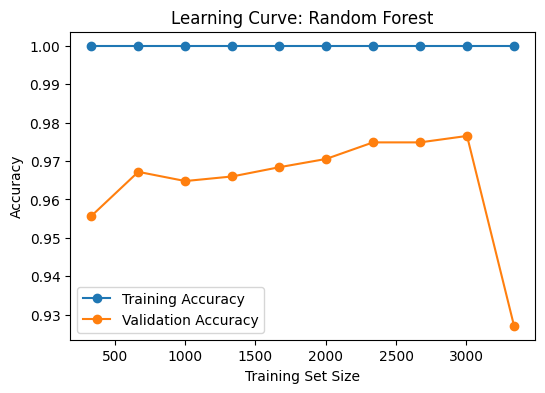

In [39]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(model, X, y, name):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring="accuracy",
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )
    
    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(6,4))
    plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
    plt.plot(train_sizes, val_mean, 'o-', label="Validation Accuracy")
    plt.title(f"Learning Curve: {name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Example: Try for Random Forest
plot_learning_curve(RandomForestClassifier(random_state=42), X, y, "Random Forest")
